In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/kaggle/input/multi-task5/RS_Session_266_AU_2573_A_and_B.iv_.csv")

In [3]:
df.head()

,Sl. No,State/UT,Govt,Govt Aided,CTSA,KVS,JNV,Independent,Grand Total
0,1,Andhra Pradesh,1031,0,0,27,14,174,1246
1,2,Assam,27,3,0,51,27,159,267
2,3,Bihar,8,0,0,40,37,957,1042
3,4,Gujarat,16,0,0,42,33,418,509
4,5,Haryana,281,1,0,29,21,1825,2157


In [16]:
df = df.drop(columns=["Sl. No"])

In [17]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Basic Statistics
print("\nBasic Statistics:\n", df.describe())


Missing Values:
 State/UT       0
Govt           0
Govt Aided     0
CTSA           0
KVS            0
JNV            0
Independent    0
Grand Total    0
dtype: int64

Basic Statistics:
               Govt  Govt Aided       CTSA          KVS         JNV  \
count    55.000000   55.000000  55.000000    55.000000   55.000000   
mean    151.672727   10.290909   0.327273    39.418182   22.509091   
std     585.242655   46.308016   1.334091   145.789002   83.361078   
min       0.000000    0.000000   0.000000     0.000000    0.000000   
25%       0.000000    0.000000   0.000000     0.500000    0.000000   
50%      10.000000    0.000000   0.000000     6.000000    4.000000   
75%      73.500000    1.000000   0.000000    39.000000   18.000000   
max    4171.000000  283.000000   9.000000  1084.000000  619.000000   

        Independent   Grand Total  
count     55.000000     55.000000  
mean     618.327273    842.545455  
std     2332.063774   3148.410874  
min        0.000000      1.000000  
25%

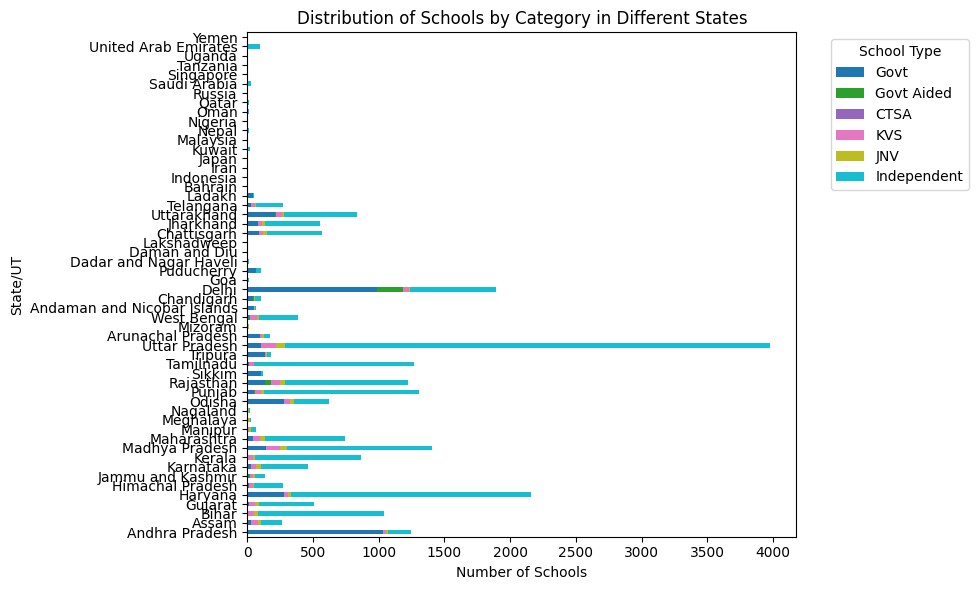

In [18]:
# Remove any row where "State/UT" contains "Total"
df_cleaned = df[~df["State/UT"].str.contains("Total", case=False, na=False)]

# Convert numeric columns explicitly
df_numeric = df_cleaned.set_index("State/UT").drop(columns=["Grand Total"]).apply(pd.to_numeric, errors="coerce")

# Plot as a horizontal stacked bar chart
df_numeric.plot(kind="barh", stacked=True, figsize=(10, 6), colormap="tab10")

plt.title("Distribution of Schools by Category in Different States")
plt.xlabel("Number of Schools")
plt.ylabel("State/UT")
plt.legend(title="School Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


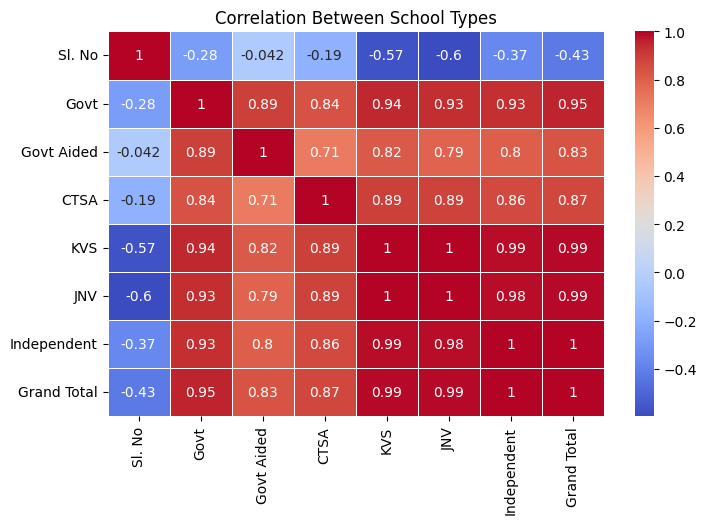

In [7]:
# Ensure only numeric columns are used in correlation
numeric_df = df.drop(columns=["State/UT"]).apply(pd.to_numeric, errors="coerce")

# Correlation Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between School Types")
plt.show()


In [20]:
indian_states = [
    "Andhra Pradesh", "Arunachal Pradesh", "Assam", "Bihar", "Chhattisgarh",
    "Goa", "Gujarat", "Haryana", "Himachal Pradesh", "Jharkhand", "Karnataka",
    "Kerala", "Madhya Pradesh", "Maharashtra", "Manipur", "Meghalaya", "Mizoram",
    "Nagaland", "Odisha", "Punjab", "Rajasthan", "Sikkim", "Tamil Nadu", "Telangana",
    "Tripura", "Uttar Pradesh", "Uttarakhand", "West Bengal"
]

# Filter dataset for Indian states only
df_india = df[df["State/UT"].isin(indian_states)].drop(columns=["Grand Total"])

# Convert to long format for dodged bar plot
df_melted = df_india.melt(id_vars=["State/UT"], var_name="School Type", value_name="Count")

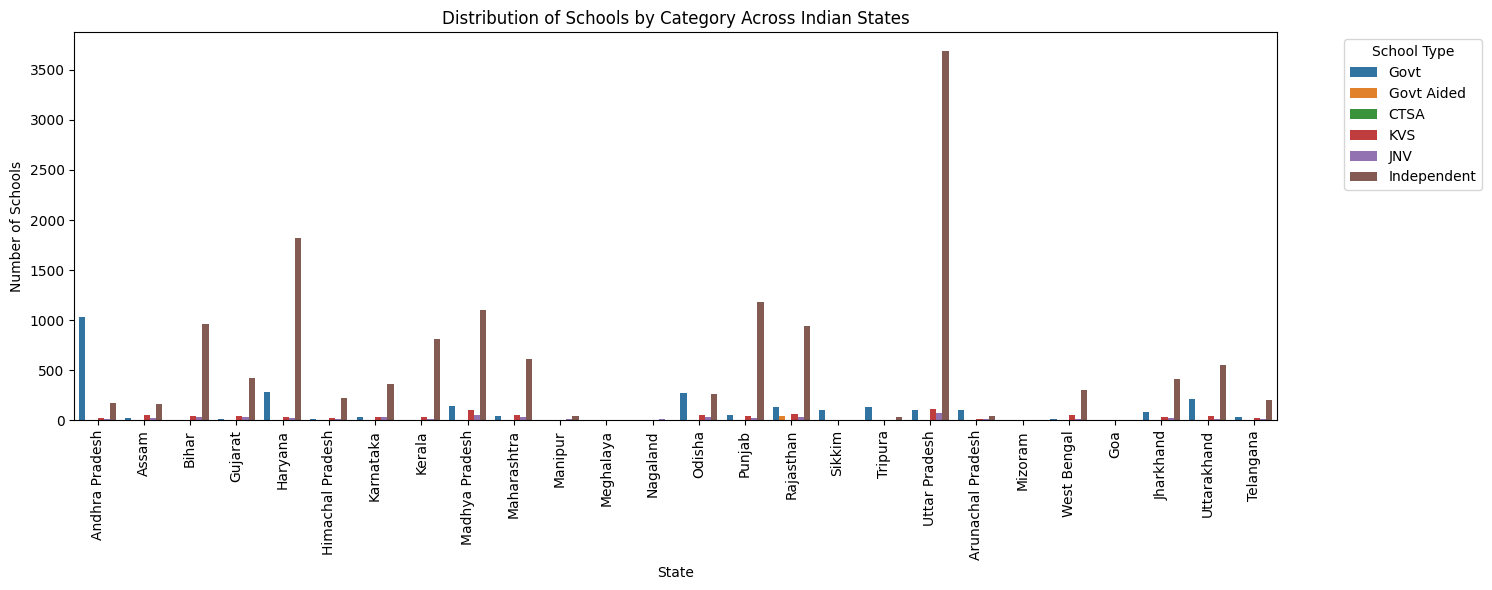

In [21]:
# Plot the grouped (dodged) bar chart
plt.figure(figsize=(15, 6))
sns.barplot(data=df_melted, x="State/UT", y="Count", hue="School Type", palette="tab10")

# Formatting
plt.xticks(rotation=90)  # Rotate state names for better readability
plt.xlabel("State")
plt.ylabel("Number of Schools")
plt.title("Distribution of Schools by Category Across Indian States")
plt.legend(title="School Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

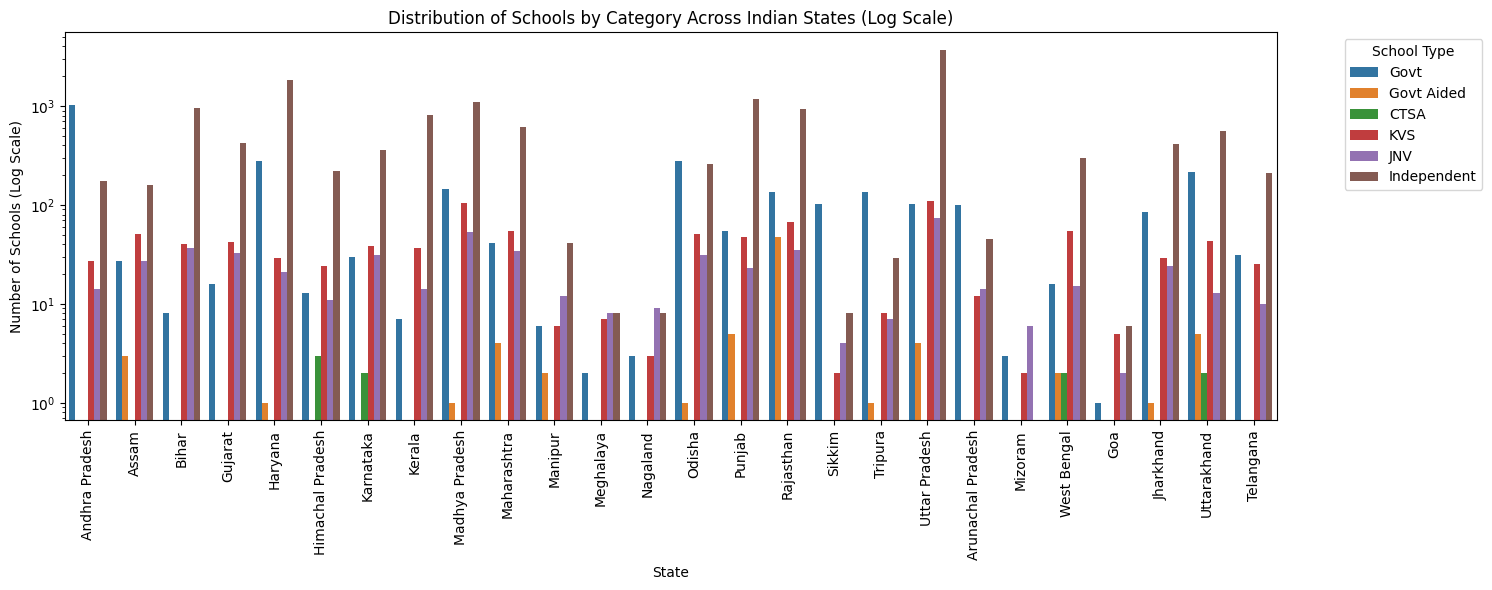

In [22]:
# Plot the grouped (dodged) bar chart with a logarithmic scale
plt.figure(figsize=(15, 6))
sns.barplot(data=df_melted, x="State/UT", y="Count", hue="School Type", palette="tab10")

# Apply logarithmic scale to y-axis
plt.yscale("log")

# Formatting
plt.xticks(rotation=90)
plt.xlabel("State")
plt.ylabel("Number of Schools (Log Scale)")
plt.title("Distribution of Schools by Category Across Indian States (Log Scale)")
plt.legend(title="School Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


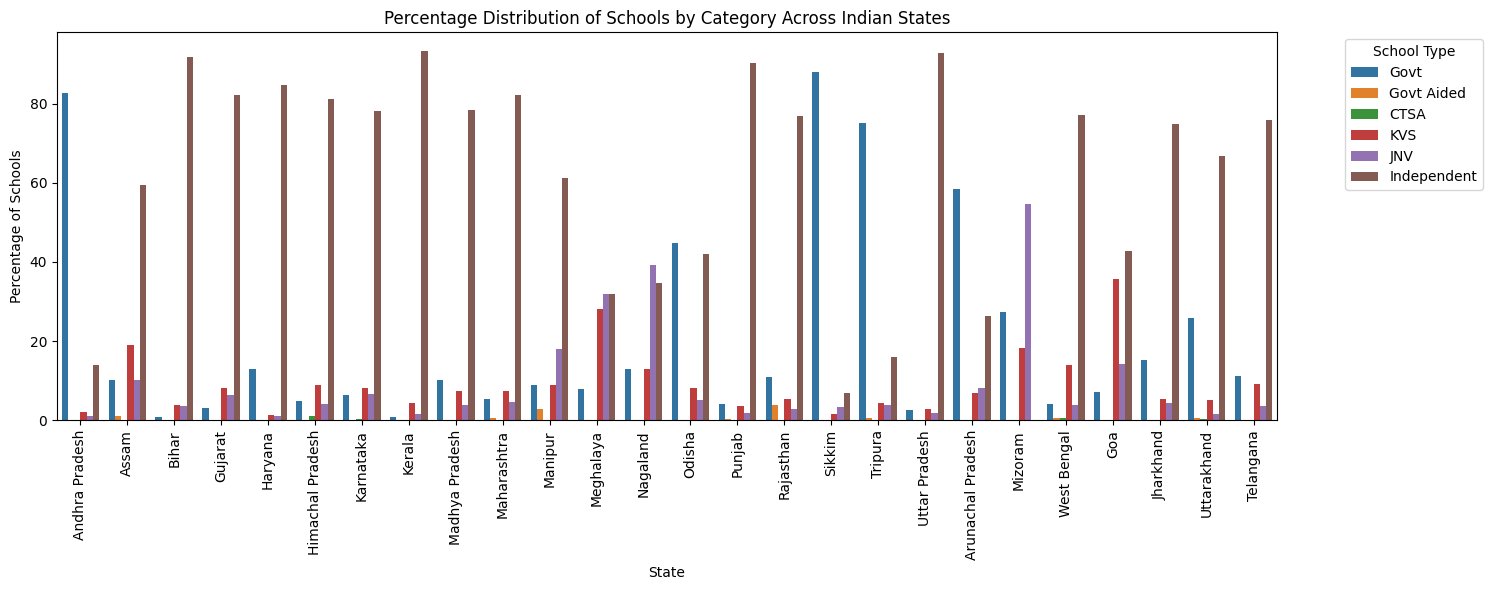

In [25]:
# Convert school counts into percentages per state
df_percent = df_india.set_index("State/UT").div(df_india.set_index("State/UT").sum(axis=1), axis=0) * 100

# Convert to long format for plotting
df_percent_melted = df_percent.reset_index().melt(id_vars=["State/UT"], var_name="School Type", value_name="Percentage")

# Plot the grouped (dodged) bar chart using percentages
plt.figure(figsize=(15, 6))
sns.barplot(data=df_percent_melted, x="State/UT", y="Percentage", hue="School Type", palette="tab10")

# Formatting
plt.xticks(rotation=90)
plt.xlabel("State")
plt.ylabel("Percentage of Schools")
plt.title("Percentage Distribution of Schools by Category Across Indian States")
plt.legend(title="School Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


<Figure size 1500x600 with 0 Axes>

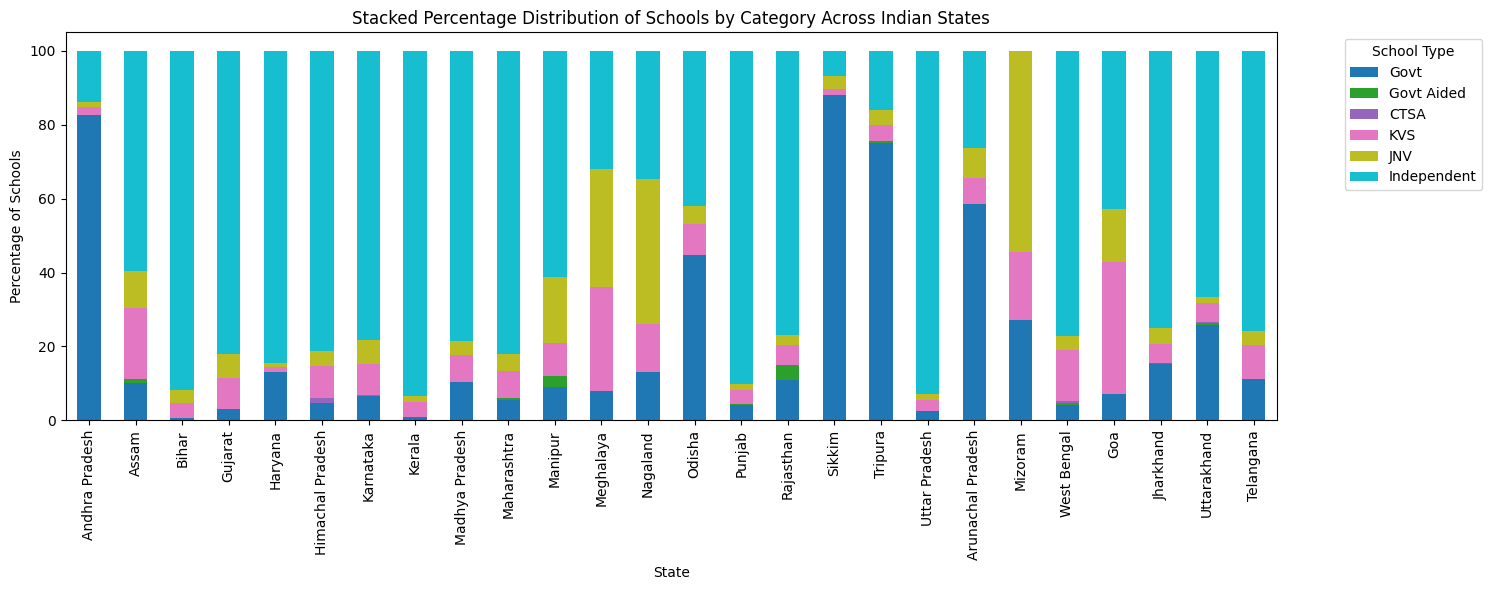

In [26]:
# Plot stacked percentage bar chart without resetting the index
plt.figure(figsize=(15, 6))
df_percent.plot(kind="bar", stacked=True, colormap="tab10", figsize=(15, 6))

# Formatting
plt.xticks(rotation=90)
plt.xlabel("State")
plt.ylabel("Percentage of Schools")
plt.title("Stacked Percentage Distribution of Schools by Category Across Indian States")
plt.legend(title="School Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


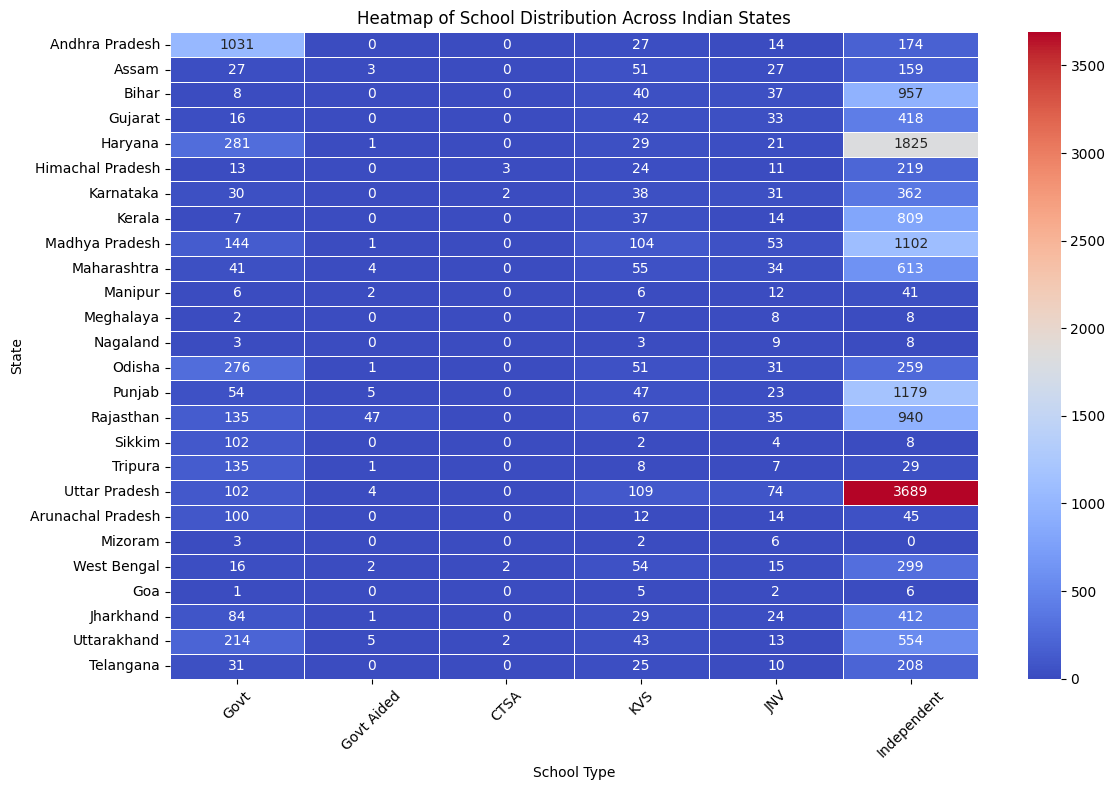

In [27]:
# Heatmap for school distribution across states
plt.figure(figsize=(12, 8))
sns.heatmap(df_india.set_index("State/UT"), cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5)

# Formatting
plt.title("Heatmap of School Distribution Across Indian States")
plt.xlabel("School Type")
plt.ylabel("State")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


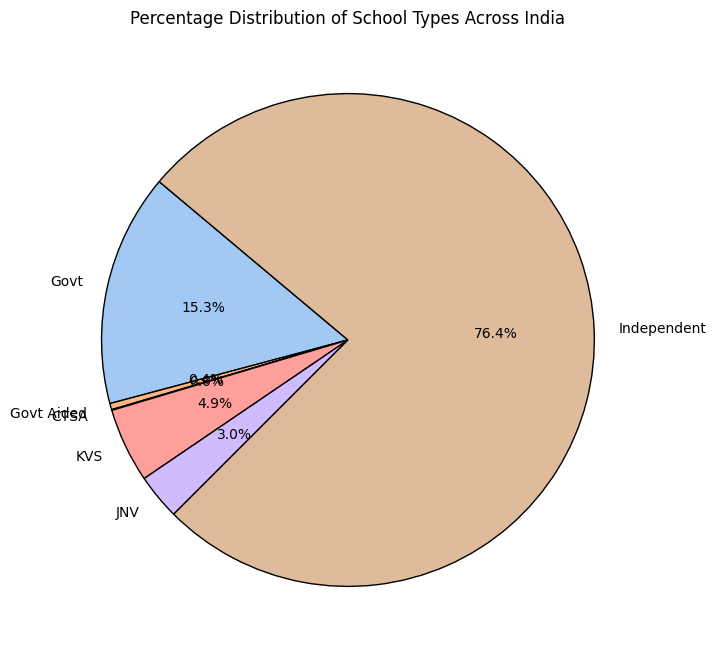

In [29]:
# Pie chart for overall school distribution by category
plt.figure(figsize=(8, 8))
df_india.drop(columns=["State/UT"]).sum().plot.pie(
    autopct="%1.1f%%", colors=sns.color_palette("pastel"), startangle=140, wedgeprops={"edgecolor": "black"}
)

# Formatting
plt.ylabel("")
plt.title("Percentage Distribution of School Types Across India")
plt.show()
